# Feature Engineering for Data Science

**Objectives:**
- Define at least three techniques of feature engineering
- Explain the importance of feature engineering in the data science process
- Identify appropriate feature engineering techniques for features in a dataset

---

**Contents:**
1. What is feature engineering and why is it important?
2. Feature engineering techniques
    - 2.1. Feature extraction
    - 2.2. Feature creation
    - 2.3. Feature transformation
    - 2.4. Feature selection    
3. Quick quiz questions!

---

## 1. What is Feature Engineering and why is it important?

The name 'feature engineering' sounds pretty explanatory - and it is. Feature Engineering is just that, engineering the features of your dataset. 

- Process of selecting, creating, or transforming features in your dataset to improve the performance of machine learning models 
- Vital role in the data science workflow
- Extract valuable information from raw data and make it more suitable for modeling
- Can improve model accuracy, reduce overfitting, and enhance interpretability.

![](https://miro.medium.com/v2/resize:fit:631/1*Og0Ce1YGQQX_YxxO3meE6w.png)

This is a relatively simple depiction, but raw data is processed through various feature engineering techniques, resulting in a set of refined features that are then used to train machine learning models. This process transforms data into a more suitable format, leading to better model performance and insights.

Why is it important?

- Improved Model Performance

- Handling Categorical Data

- Handling Non-Linearity

- Noise Reduction
- Dealing with Missing Data
- Enhanced Interpretability
- Domain Knowledge Utilization

Feature engineering is the bridge between raw data and machine learning models. It plays a vital role in extracting valuable information, improving model performance, and making models more suitable for real-world applications. It's an essential step in the data science workflow that can make or break the success of a machine learning project.

In [39]:
import pandas as pd

# Load the NYC Taxi dataset csv
df = pd.read_csv('nyc_taxi_1000.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   id                  1000 non-null   object 
 2   vendor_id           1000 non-null   int64  
 3   pickup_datetime     1000 non-null   object 
 4   dropoff_datetime    1000 non-null   object 
 5   passenger_count     1000 non-null   int64  
 6   pickup_longitude    1000 non-null   float64
 7   pickup_latitude     1000 non-null   float64
 8   dropoff_longitude   1000 non-null   float64
 9   dropoff_latitude    1000 non-null   float64
 10  store_and_fwd_flag  1000 non-null   object 
 11  trip_duration       1000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 93.9+ KB


---
## 2. Feature Engineering techniques

### 2.1 Feature Extraction

Much like the name sounds - extracting aspects of our features

- Date/time variables
- Text processing
- Image processing

Let's have a look at an example using the date variable:

In [40]:
# Convert the 'pickup_datetime' and 'dropoff_datetime' columns to datetime format if they are not already in it
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Extract month, day of the week, and hour for pickup_datetime
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Extract month, day of the week, and hour for dropoff_datetime
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_dayofweek'] = df['dropoff_datetime'].dt.dayofweek
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

# Let's have a look at our df now to see what we have
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_dayofweek,pickup_hour,dropoff_month,dropoff_dayofweek,dropoff_hour
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0,17,3,0,17
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,0,6,6,0
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,11,1,1,12
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2,19,4,2,19
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5,13,3,5,13


---
### 2.2 Feature Creation

Sometimes we can even create features from our variables that we already have, that can help inform our model even more.

- Creating a 'season' variable for produce price predictions
- Moving averages for trends in financial data
- Geospatial Features for Real Estate Prices
    
Let's use the month feature we extracted above to create a season feature in our dataset as well. Is season something that could be useful for our model?

In [41]:
# Let's first create a function that can convert from the month number to the corresponding season
def month_to_season(month):
    
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

In [42]:
# Let's also create a function to convert our hour of the day into a more recognisable 'time of day'
def hour_to_time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'night'

In [43]:
# Only applying this to the pickup month, as it's very unlikely a trip will go over multiple seasons!
df['trip_season'] = df['pickup_month'].apply(month_to_season)

df['pickup_time_of_day'] = df['pickup_hour'].apply(hour_to_time_of_day)
df['dropoff_time_of_day'] = df['dropoff_hour'].apply(hour_to_time_of_day)

In [44]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,trip_duration,pickup_month,pickup_dayofweek,pickup_hour,dropoff_month,dropoff_dayofweek,dropoff_hour,trip_season,pickup_time_of_day,dropoff_time_of_day
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,...,455,3,0,17,3,0,17,Spring,afternoon,afternoon
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,...,663,6,6,0,6,6,0,Summer,night,night
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,...,2124,1,1,11,1,1,12,Winter,morning,afternoon
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,...,429,4,2,19,4,2,19,Spring,night,night
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,...,435,3,5,13,3,5,13,Spring,afternoon,afternoon


---
### 2.3 Feature Transformation

Involves modifying the scale, distribution, or form of features to make them more suitable for machine learning models. It can help us to incorporate more features that we think may be relevant and useful for our model, even if at the raw data stage they are not in the appropriate format.

- Feature Scaling:
     - Normalisation, Standardisation:
     ```python
     from sklearn.preprocessing import StandardScaler
     
     scaler = StandardScaler()
     
     scaler.fit_transform(X_train)
     
     scaler.transform(X_test)
     ```
- Log Transformation

- Creating Dummy Variables (One-Hot Encoding)
    
Let's try creating dummy variables for the categorical features in our dataset:

In [45]:
df = pd.get_dummies(data=df, columns=['store_and_fwd_flag', 'trip_season', 'pickup_time_of_day', 'dropoff_time_of_day', 'vendor_id'])

In [46]:
df.head()

,Unnamed: 0,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,trip_season_Summer,trip_season_Winter,pickup_time_of_day_afternoon,pickup_time_of_day_morning,pickup_time_of_day_night,dropoff_time_of_day_afternoon,dropoff_time_of_day_morning,dropoff_time_of_day_night,vendor_id_1,vendor_id_2
0,0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,0,1,0,0,1,0,0,0,1
1,1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,1,0,0,0,1,0,0,1,1,0
2,2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,...,0,1,0,1,0,1,0,0,0,1
3,3,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,0,0,0,0,1,0,0,1,0,1
4,4,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,0,0,1,0,0,1,0,0,0,1


---
### 2.4 Feature Selection

#### Removing unimportant or not useful features

Sometimes through our EDA or perhaps our domain knowledge, we can do some feature selection. 
- Features with many missing values
- Features we know will not be useful in our model

Luckily for us, our dataset does not have any missing values. However, in our dataset, the 'dropoff' features may not actually be of any use to us - if we're trying to predict a trip duration before even setting off, we're not going to know the dropoff information, other than the location! Let's drop these columns:

In [34]:
df.isna().sum()

Unnamed: 0                       0
id                               0
vendor_id                        0
pickup_datetime                  0
dropoff_datetime                 0
passenger_count                  0
pickup_longitude                 0
pickup_latitude                  0
dropoff_longitude                0
dropoff_latitude                 0
trip_duration                    0
pickup_month                     0
pickup_dayofweek                 0
pickup_hour                      0
dropoff_month                    0
dropoff_dayofweek                0
dropoff_hour                     0
store_and_fwd_flag_N             0
store_and_fwd_flag_Y             0
trip_season_Spring               0
trip_season_Summer               0
trip_season_Winter               0
pickup_time_of_day_afternoon     0
pickup_time_of_day_morning       0
pickup_time_of_day_night         0
dropoff_time_of_day_afternoon    0
dropoff_time_of_day_morning      0
dropoff_time_of_day_night        0
dtype: int64

In [35]:
columns_to_drop = [col for col in df.columns if col.startswith('dropoff_')]

df = df.drop(columns = columns_to_drop)

df.columns

Index(['Unnamed: 0', 'id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'trip_duration', 'pickup_month',
       'pickup_dayofweek', 'pickup_hour', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'trip_season_Spring', 'trip_season_Summer',
       'trip_season_Winter', 'pickup_time_of_day_afternoon',
       'pickup_time_of_day_morning', 'pickup_time_of_day_night'],
      dtype='object')

In [36]:
df = df.drop(columns = ['Unnamed: 0', 'id', 'pickup_datetime'])

#### Correlation analysis

We can also use correlation thresholds to decide what features to keep and what to drop. Sometimes the features that are more highly correlated with our outcome variable are the better predictors.

In [37]:
df.corr()['trip_duration']

vendor_id                       0.018565
passenger_count                 0.017914
pickup_longitude                0.054602
pickup_latitude                -0.063903
trip_duration                   1.000000
pickup_month                   -0.010142
pickup_dayofweek                0.019792
pickup_hour                    -0.049185
store_and_fwd_flag_N            0.003645
store_and_fwd_flag_Y           -0.003645
trip_season_Spring             -0.028268
trip_season_Summer             -0.000203
trip_season_Winter              0.030493
pickup_time_of_day_afternoon   -0.001869
pickup_time_of_day_morning     -0.012866
pickup_time_of_day_night        0.012837
Name: trip_duration, dtype: float64

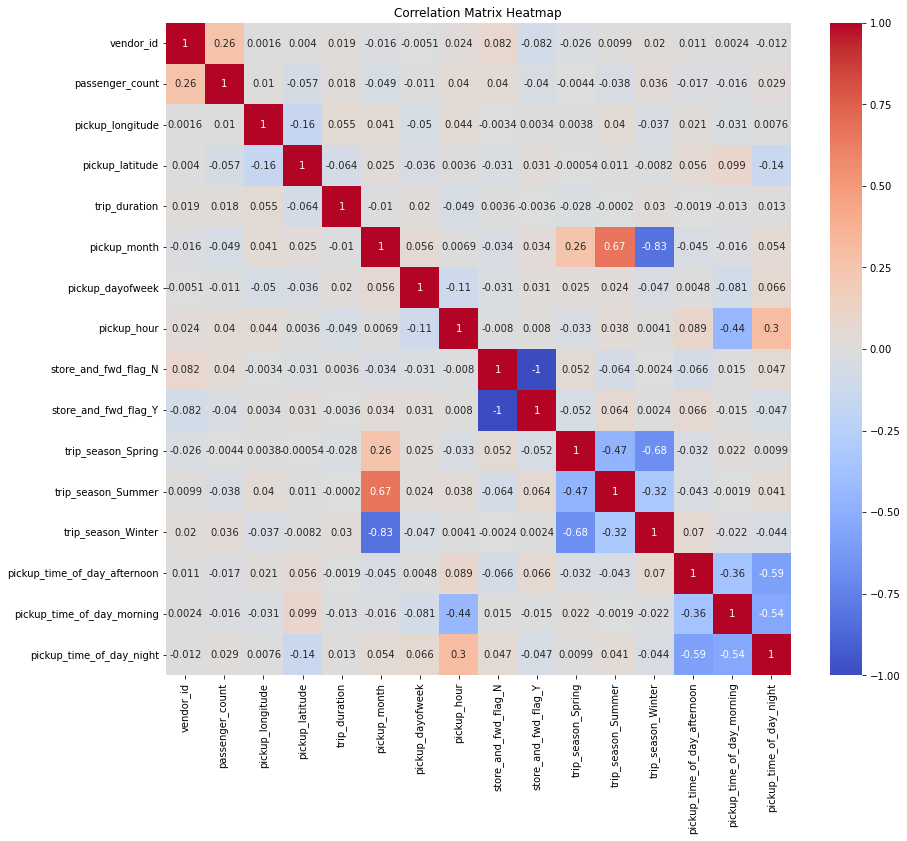

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Note:** Remember that correlation only looks at linear relationships. Deciding whether correlation analysis is useful for your feature selection may be affected by whether relationships between your variables are linear or non-linear. EDA can help with identifying these relationships (think scatterplots!)

In [13]:
# How would you drop features that have below a certain correlation threshold with your outcome variable?

#### Dimensionality reduction

The process of reducing dimensionality in our dataset. We may have a dataset with a very large number of features, which can make our dataset and our model much harder to interpret if we're keeping all of those features.

- Forwards/backwards stepwise selection
- Correlation analysis (as above)
- Principle component analysis (PCA) - *beyond the scope of this sprint - we'll revisit in more detail in Unsupervised Learning!*
    - technique that transforms features into linear combinations of the original features. It can help reduce the dimensionality of the data while preserving as much variance as possible.

![](https://www.sc-best-practices.org/_images/dimensionality_reduction.jpeg)

## 3. Quick quiz questions!

1. Why is feature engineering important?
    - It can help improve model performance
    - It helps us to remove noise in the data
    - We can incorporate domain knowledge into certain aspects of it
    - All of the above


2. Feature engineering comes after the modelling process. True/False?

3. What feature engineering technique could we use to deal with features that sit on very different ranges?

4. Categorical features are excluded from correlation analysis. True/False?

5. Say we have a dataset of students in different school classes and their final exam score average. From the below columns and datatypes, which of these features could we potentially create dummy variables from?

| Column name | Datatype |
| --- | --- |
| Date | datetime |
| Sex | object |
| Age | int64 |
| Height | float64 |
| Class | object |
| ExamAvg | float64 |